# Question 1: Diabetes Prediction

In [17]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score, classification_report
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("cleaned_data_part1.csv")

In [20]:
data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,SIALANG,...,LBDHDD,LBDHDDSI,MCQ010,MCQ053,MCQ092,MCQ300B,SMAQUEX2,SMAQUEX,LBXTC,LBDTCSI
0,109266.0,66.0,2.0,2.0,29.0,5.0,6.0,2.0,2.0,1.0,...,56.0,1.45,2.0,2.0,9.0,2.0,1.0,2.0,195.0,5.04
1,109271.0,66.0,2.0,1.0,49.0,3.0,3.0,2.0,1.0,1.0,...,33.0,0.85,1.0,2.0,2.0,9.0,1.0,2.0,147.0,3.80
2,109273.0,66.0,2.0,1.0,36.0,3.0,3.0,2.0,1.0,1.0,...,42.0,1.09,2.0,2.0,2.0,2.0,1.0,2.0,164.0,4.24
3,109274.0,66.0,2.0,1.0,68.0,5.0,7.0,1.0,1.0,1.0,...,29.0,0.75,2.0,2.0,2.0,2.0,1.0,2.0,105.0,2.72
4,109282.0,66.0,2.0,1.0,76.0,3.0,3.0,2.0,1.0,1.0,...,43.0,1.11,2.0,1.0,2.0,9.0,1.0,2.0,233.0,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52585,71899.0,7.0,2.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
52586,71903.0,7.0,2.0,2.0,6.0,4.0,4.0,1.0,1.0,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
52587,71905.0,7.0,1.0,2.0,8.0,5.0,6.0,NaN,1.0,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
52588,71906.0,7.0,2.0,2.0,4.0,5.0,6.0,2.0,1.0,1.0,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,SIALANG,...,LBDHDD,LBDHDDSI,MCQ010,MCQ053,MCQ092,MCQ300B,SMAQUEX2,SMAQUEX,LBXTC,LBDTCSI
count,52590.000000,52590.000000,52590.000000,52590.000000,52590.000000,52590.000000,52590.000000,49679.000000,52590.000000,52590.000000,...,39435.000000,39435.000000,52590.000000,52590.000000,46194.000000,46194.000000,38820.00000,37082.000000,39434.000000,39434.000000
mean,92689.411333,24.870013,1.944647,1.506256,33.990150,3.181080,3.406427,1.503211,1.247994,1.113253,...,53.408926,1.381275,1.853641,1.974273,1.976447,1.884963,1.14441,1.848822,179.810012,4.649900
std,18512.941871,25.981816,0.228670,0.499966,24.586122,1.265499,1.644652,0.499995,1.774826,0.316905,...,15.150269,0.391756,0.426643,0.303001,0.714506,1.091715,0.35151,0.358228,40.927101,1.058414
min,62161.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,0.130000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,59.000000,1.530000
25%,77498.250000,8.000000,2.000000,1.000000,11.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,43.000000,1.110000,2.000000,2.000000,2.000000,1.000000,1.00000,2.000000,151.000000,3.900000
50%,91196.500000,9.000000,2.000000,2.000000,30.000000,3.000000,3.000000,2.000000,1.000000,1.000000,...,51.000000,1.320000,2.000000,2.000000,2.000000,2.000000,1.00000,2.000000,175.000000,4.530000
75%,111180.750000,66.000000,2.000000,2.000000,55.000000,4.000000,4.000000,2.000000,1.000000,1.000000,...,62.000000,1.600000,2.000000,2.000000,2.000000,2.000000,1.00000,2.000000,204.000000,5.280000
max,124822.000000,66.000000,2.000000,2.000000,80.000000,5.000000,7.000000,2.000000,99.000000,2.000000,...,226.000000,5.840000,9.000000,9.000000,9.000000,9.000000,2.00000,2.000000,813.000000,21.020000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52590 entries, 0 to 52589
Columns: 192 entries, SEQN to LBDTCSI
dtypes: float64(192)
memory usage: 77.0 MB


In [23]:
data = data.loc[~((data['DIQ010'] == 7) | (data['DIQ010'] == 9))] # remove data where DIQ010 is missing or not specified

In [24]:
data['DIQ010'].unique()

array([2., 1., 3.])

In [25]:
data.loc[:, 'DIQ010'] = data['DIQ010'].replace({1: 0, 2: 1, 3: 2})

In [26]:
data['DIQ010'].unique()

array([1., 0., 2.])

# EDA

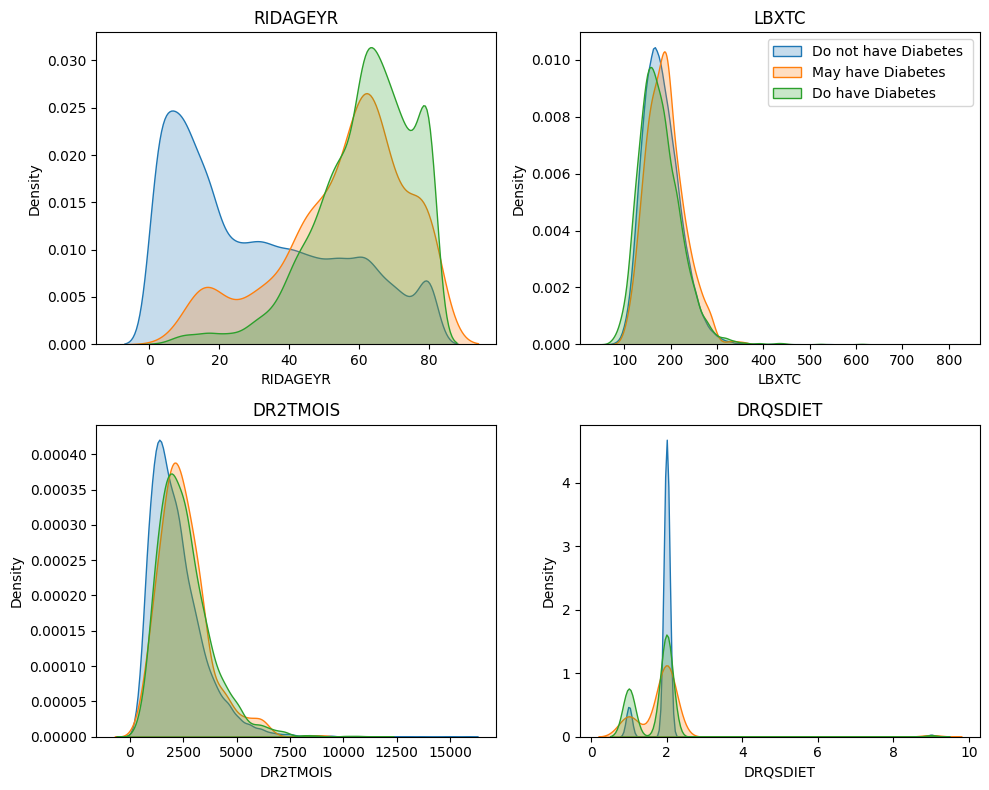

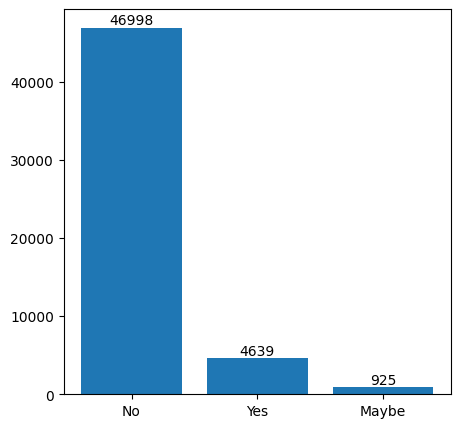

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
cols_to_plot = ['RIDAGEYR', 'LBXTC', 'DR2TMOIS','DRQSDIET']
for i, col in enumerate(cols_to_plot):
    ax = plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=data[data['DIQ010'] == 1], x=col, fill=True, label='Do not have Diabetes ', ax=ax)
    sns.kdeplot(data=data[data['DIQ010'] == 2], x=col, fill=True, label='May have Diabetes', ax=ax)
    sns.kdeplot(data=data[data['DIQ010'] == 0], x=col, fill=True, label='Do have Diabetes', ax=ax)

    plt.title(col)
    if i == 1:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

plt.tight_layout()

# Bar plot for 'DIQ010' distribution
plt.figure(figsize=(5, 5))
y_vals = ['No','Yes','Maybe']
y_counts = data['DIQ010'].value_counts()
plt.bar(y_vals, y_counts)
plt.text(y_vals[1], y_counts[0], str(y_counts[0]), ha='center', va='bottom')
plt.text(y_vals[0], y_counts[1], str(y_counts[1]), ha='center', va='bottom')
plt.text(y_vals[2], y_counts[2], str(y_counts[2]), ha='center', va='bottom')
plt.show()

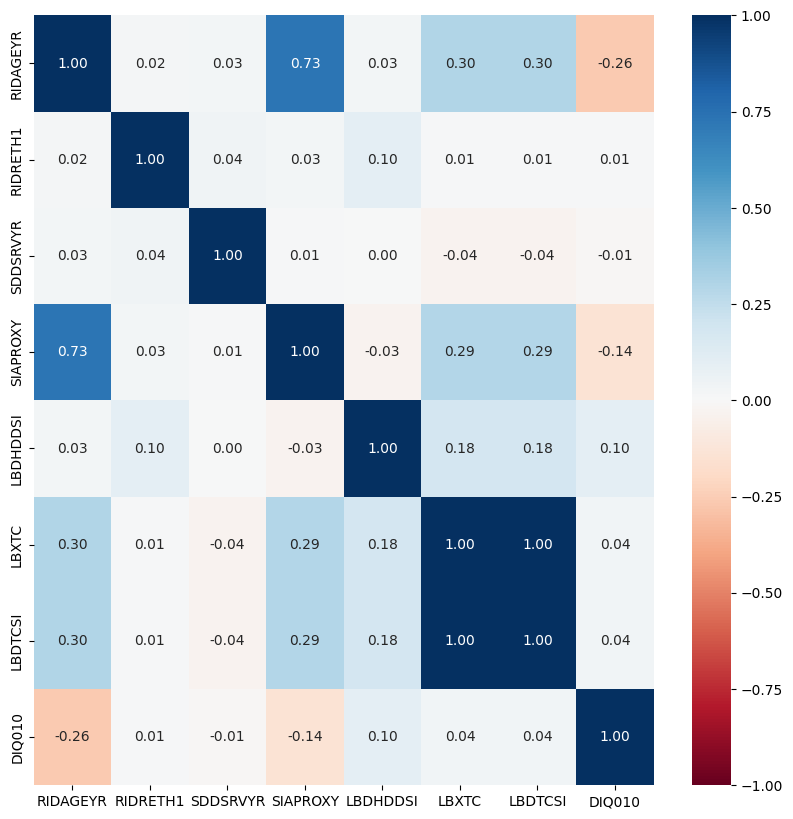

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(data[['RIDAGEYR','RIDRETH1','SDDSRVYR','SIAPROXY','LBDHDDSI','LBXTC','LBDTCSI','DIQ010']].corr(), cmap="RdBu",vmax=1,vmin=-1,annot=True, fmt=".2f")
plt.show()

# Data preparation

In [29]:
X = data.drop(['DIQ010'], axis=1)
y = data.DIQ010

In [30]:
X.drop('SEQN',axis=1,inplace=True)

In [31]:
X

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,SIALANG,SIAPROXY,...,LBDHDD,LBDHDDSI,MCQ010,MCQ053,MCQ092,MCQ300B,SMAQUEX2,SMAQUEX,LBXTC,LBDTCSI
0,66.0,2.0,2.0,29.0,5.0,6.0,2.0,2.0,1.0,2.0,...,56.0,1.45,2.0,2.0,9.0,2.0,1.0,2.0,195.0,5.04
1,66.0,2.0,1.0,49.0,3.0,3.0,2.0,1.0,1.0,2.0,...,33.0,0.85,1.0,2.0,2.0,9.0,1.0,2.0,147.0,3.80
2,66.0,2.0,1.0,36.0,3.0,3.0,2.0,1.0,1.0,2.0,...,42.0,1.09,2.0,2.0,2.0,2.0,1.0,2.0,164.0,4.24
3,66.0,2.0,1.0,68.0,5.0,7.0,1.0,1.0,1.0,2.0,...,29.0,0.75,2.0,2.0,2.0,2.0,1.0,2.0,105.0,2.72
4,66.0,2.0,1.0,76.0,3.0,3.0,2.0,1.0,1.0,2.0,...,43.0,1.11,2.0,1.0,2.0,9.0,1.0,2.0,233.0,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52585,7.0,2.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
52586,7.0,2.0,2.0,6.0,4.0,4.0,1.0,1.0,1.0,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
52587,7.0,1.0,2.0,8.0,5.0,6.0,NaN,1.0,1.0,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
52588,7.0,2.0,2.0,4.0,5.0,6.0,2.0,1.0,1.0,1.0,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
y

0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
52585    1.0
52586    1.0
52587    1.0
52588    1.0
52589    1.0
Name: DIQ010, Length: 52562, dtype: float64

In [33]:
y.unique()

array([1., 0., 2.])

In [34]:
len(data.loc[:, data.nunique() < 8].columns)

42

# Feature Importance using Random forest classifier

Text(0, 0.5, 'Mean decrease in impurity')

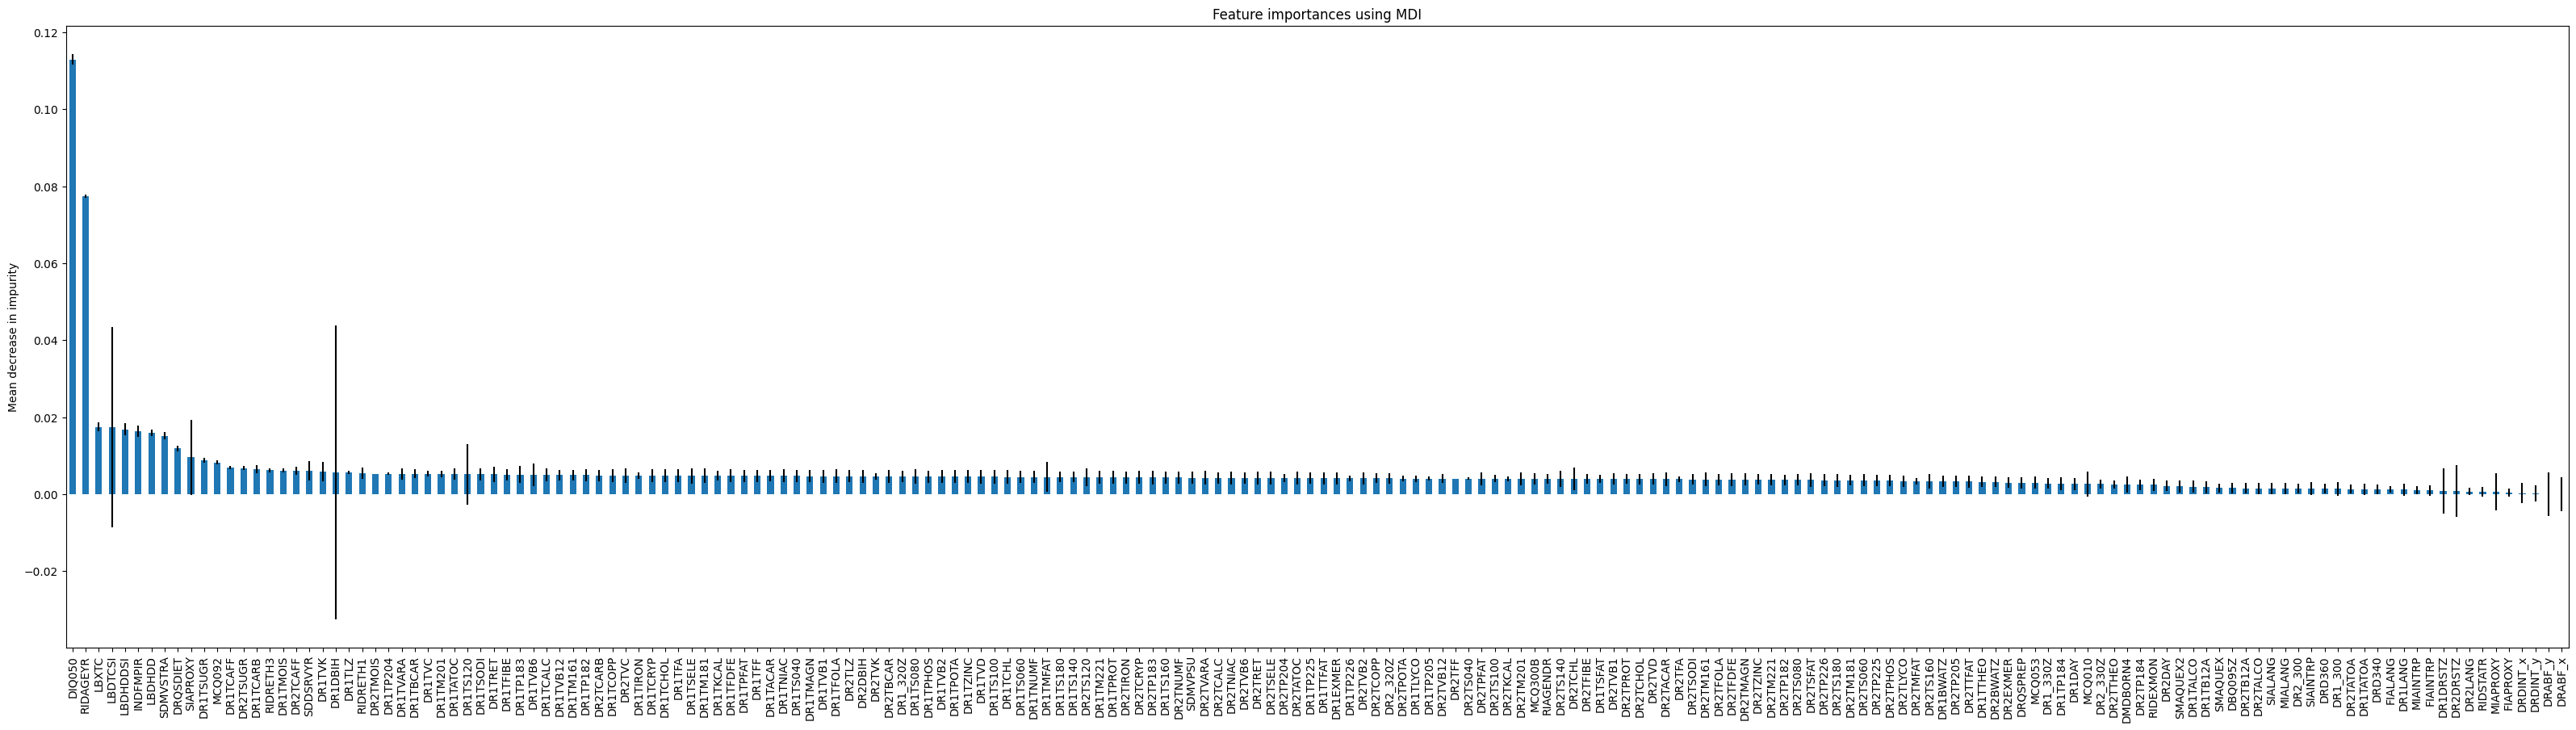

In [35]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert arrays back to DataFrame to preserve column names
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)


# Fit and transform the data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

imp = pd.Series(model.feature_importances_, index=X_train.columns)
imp.sort_values(ascending=False, inplace=True)
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

fig, ax = plt.subplots(figsize=(40, 10))
imp.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [58]:
features = imp[:30].index # selected the top30 features

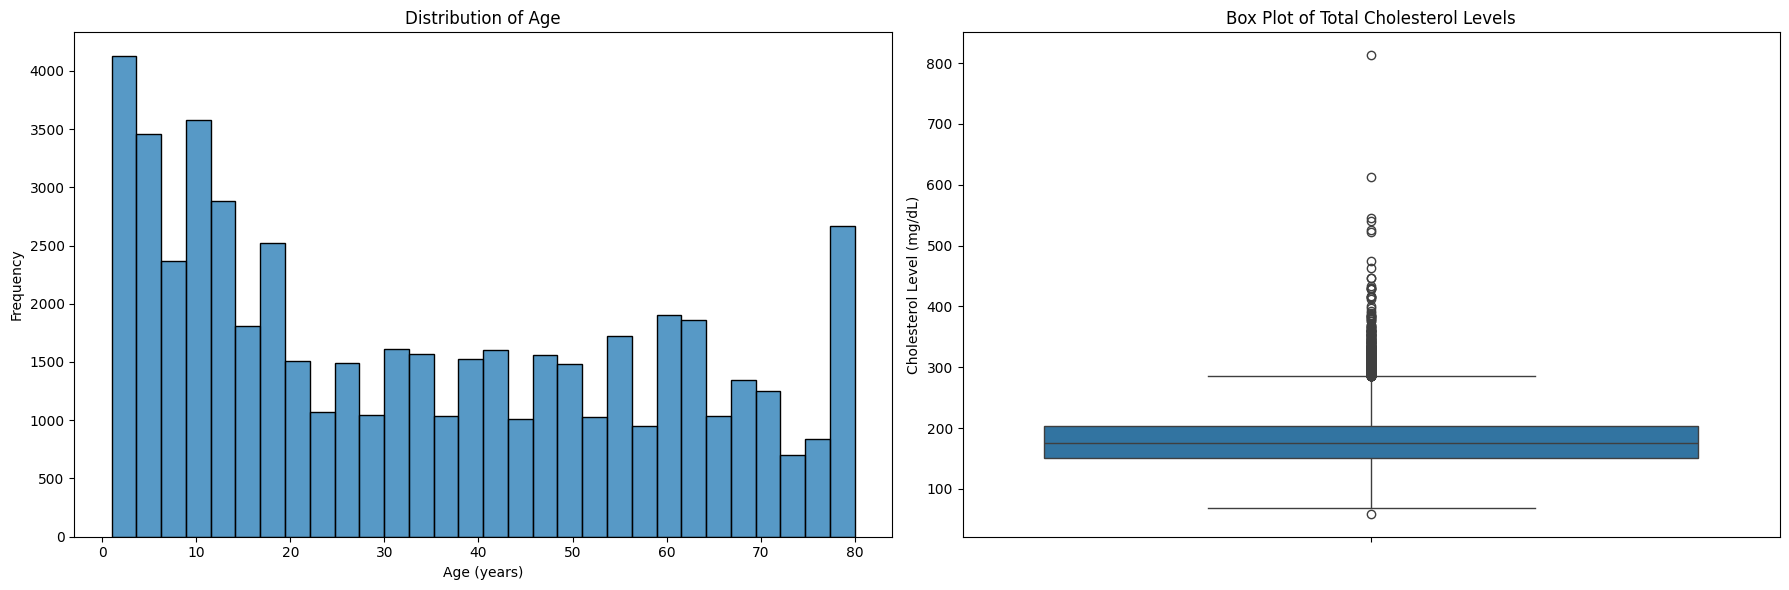

In [37]:
correlation_matrix = data[features].corr()

# Setting up the plot area
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the distribution of age
sns.histplot(data['RIDAGEYR'], bins=30, kde=False, ax=ax[0])
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age (years)')
ax[0].set_ylabel('Frequency')

# Plotting the box plot for total cholesterol
sns.boxplot(y=data['LBXTC'], ax=ax[1])
ax[1].set_title('Box Plot of Total Cholesterol Levels')
ax[1].set_ylabel('Cholesterol Level (mg/dL)')

plt.tight_layout()
plt.show()

In [38]:
X = X[features]

In [39]:
categorical_data = X.loc[:, X.nunique() < 8].columns

In [40]:
categorical_data

Index(['DIQ050', 'DRQSDIET', 'SIAPROXY', 'MCQ092', 'RIDRETH3', 'SDDSRVYR',
       'RIDRETH1'],
      dtype='object')

In [41]:
numerical_data = X.columns[~X.columns.isin(categorical_data)]

In [42]:
numerical_data

Index(['RIDAGEYR', 'LBXTC', 'LBDTCSI', 'LBDHDDSI', 'INDFMPIR', 'LBDHDD',
       'SDMVSTRA', 'DR1TSUGR', 'DR1TCAFF', 'DR2TSUGR', 'DR1TCARB', 'DR1TMOIS',
       'DR2TCAFF', 'DR1TVK', 'DR1DBIH', 'DR1TLZ', 'DR2TMOIS', 'DR1TP204',
       'DR1TVARA', 'DR1TBCAR', 'DR1TVC', 'DR1TM201', 'DR1TATOC'],
      dtype='object')

# Pipeline for the model

In [43]:
numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

In [44]:
Categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [45]:
Preprocessor = ColumnTransformer(
    transformers=[("num",numerical_pipeline, numerical_data),
                  ("cat",Categorical_pipeline, categorical_data)
])

In [46]:
Pipeline = Pipeline([
    ("Preprocessor",Preprocessor),
    ("classifier",xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1))
])

# Test-Train Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## We used GridsearchCV and RandomSearchCV, but we found that the default parameter gave the best results for Xgboost

In [48]:
param_distributions = {             # Maximum depth of a tree
    'classifier__min_child_weight': [None, 1, 5, 10],       # Minimum sum of instance weight(hessian) needed in a child
    'classifier__learning_rate': [None, 0.01, 0.1, 0.2],    # Step size shrinkage used in update to prevent overfitting
    'classifier__n_estimators': [None,100, 200, 300]       # Number of trees
}

In [49]:
default_params = xgb.XGBClassifier().get_params()
default_params

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [50]:
f1_scorer = make_scorer(f1_score, average='weighted')

In [51]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    Pipeline,
    param_distributions=param_distributions,
    n_iter=8,
    cv=3,
    scoring=f1_scorer,
    verbose=5,
    random_state=42,
    n_jobs=3
)

In [52]:
Pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['RIDAGEYR', 'LBXTC', 'LBDTCSI', 'LBDHDDSI', 'INDFMPIR', 'LBDHDD',
       'SDMVSTRA', 'DR1TSUGR', 'DR1TCAFF', 'DR2TSUGR', 'DR1TCARB', 'DR1TMOIS',
       'DR2TCAFF', 'DR1TVK', 'DR1DBIH', 'DR1TLZ', 'DR2TMOIS', 'DR1TP204',
       'DR1TVARA', 'DR1TBCAR', 'DR1TVC', 'DR1TM20...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [53]:
y_pred = Pipeline.predict(X_test)

In [54]:
from sklearn import metrics

In [55]:
acc = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

In [56]:
print(acc*100)
print(confusion_matrix)

93.14182440787596
[[ 468  515    0]
 [  61 9299    0]
 [   7  138   25]]


In [57]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
micro_f1 = f1_score(y_test, y_pred, average='micro')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Macro-average F1 score: {macro_f1}")
print(f"Micro-average F1 score: {micro_f1}")
print(f"Weighted-average F1 score: {weighted_f1}")

# For detailed classification report
print(classification_report(y_test, y_pred))

Macro-average F1 score: 0.6118777634890441
Micro-average F1 score: 0.9314182440787596
Weighted-average F1 score: 0.9191717833062532
              precision    recall  f1-score   support

         0.0       0.87      0.48      0.62       983
         1.0       0.93      0.99      0.96      9360
         2.0       1.00      0.15      0.26       170

    accuracy                           0.93     10513
   macro avg       0.94      0.54      0.61     10513
weighted avg       0.93      0.93      0.92     10513

